In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df=pd.read_csv("iot.csv")
df

,Timestamp,Temperature,Humidity,PPM
0,12/20/2023,312.0,12.0,232.0
1,21-11-2023,23.0,34.0,2.0
2,21-11-2023,23.0,34.0,2.0
3,21-11-2023,23.0,34.0,2.0
4,1/1/1970 1:00,29.0,88.0,138.0
...,...,...,...,...
19358,12/16/2023 19:46,32.0,84.0,81.0
19359,12/16/2023 19:47,32.0,84.0,81.0
19360,12/16/2023 19:47,32.0,84.0,81.0
19361,12/16/2023 19:48,32.0,84.0,81.0


In [ ]:
df.info

<bound method DataFrame.info of               Timestamp  Temperature  Humidity    PPM
0            12/20/2023        312.0      12.0  232.0
1            21-11-2023         23.0      34.0    2.0
2            21-11-2023         23.0      34.0    2.0
3            21-11-2023         23.0      34.0    2.0
4         1/1/1970 1:00         29.0      88.0  138.0
...                 ...          ...       ...    ...
19358  12/16/2023 19:46         32.0      84.0   81.0
19359  12/16/2023 19:47         32.0      84.0   81.0
19360  12/16/2023 19:47         32.0      84.0   81.0
19361  12/16/2023 19:48         32.0      84.0   81.0
19362  12/16/2023 19:48         32.0      84.0   82.0

[19363 rows x 4 columns]>

In [ ]:
df.isnull().sum()

Timestamp      0
Temperature    3
Humidity       3
PPM            3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Timestamp      0
Temperature    0
Humidity       0
PPM            0
dtype: int64

In [ ]:
df.shape

(19360, 4)

In [ ]:
# Menghapus baris berdasarkan ID dari 1 hingga 12
df = df.iloc[56:]

In [ ]:
# Hapus baris yang mengandung nilai 0 dari semua kolom
df= df[(df != 0).all(axis=1)]

In [ ]:
df.shape

(19224, 4)

In [ ]:
df.info

<bound method DataFrame.info of               Timestamp  Temperature  Humidity    PPM
56      12/8/2023 23:08         26.0      96.0  128.0
57      12/8/2023 23:09         26.0      96.0  137.0
58      12/8/2023 23:09         26.0      96.0  130.0
59      12/8/2023 23:09         26.0      96.0  131.0
60      12/8/2023 23:10         26.0      96.0  130.0
...                 ...          ...       ...    ...
19358  12/16/2023 19:46         32.0      84.0   81.0
19359  12/16/2023 19:47         32.0      84.0   81.0
19360  12/16/2023 19:47         32.0      84.0   81.0
19361  12/16/2023 19:48         32.0      84.0   81.0
19362  12/16/2023 19:48         32.0      84.0   82.0

[19224 rows x 4 columns]>

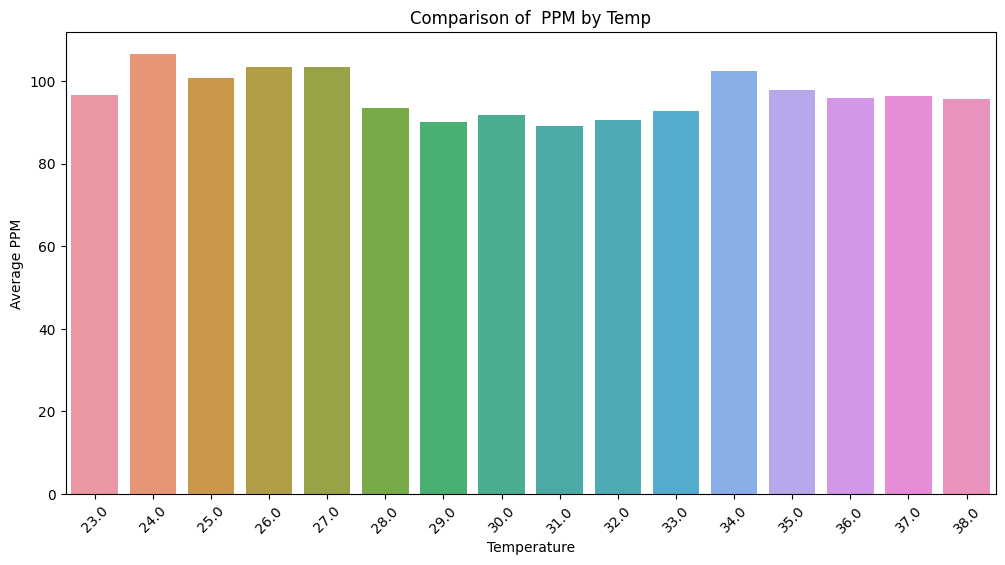

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Temperature", y="PPM", data=df, errorbar=None)
plt.title("Comparison of  PPM by Temp")
plt.xlabel("Temperature")
plt.ylabel("Average PPM")
plt.xticks(rotation=45)
plt.show()

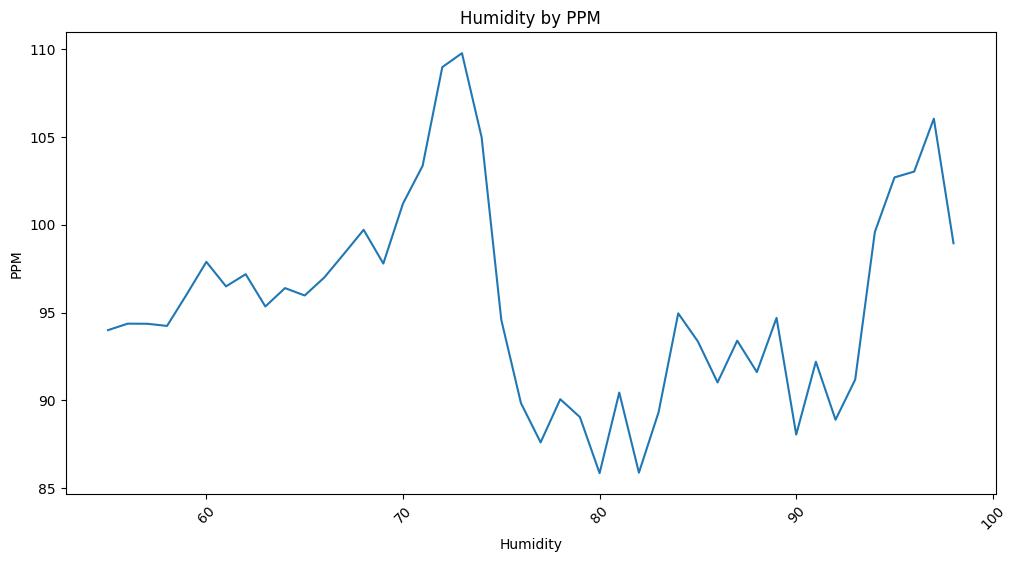

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Humidity", y="PPM", data=df, errorbar=None)
plt.title("Humidity by PPM")
plt.xlabel("Humidity")
plt.ylabel("PPM")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define columns to be used
columns_to_check = ['Humidity', 'Temperature', 'PPM']

# Calculate IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define a threshold to identify outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Create a boolean mask for outliers
outlier_mask = ((df[columns_to_check] < (Q1 - threshold * IQR)) | (df[columns_to_check] > (Q3 + threshold * IQR)))


In [ ]:
# Drop rows containing outliers
df_no_outliers = df[~outlier_mask.any(axis=1)]

In [ ]:
# Display information about the removed outliers
print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")


Number of rows before removing outliers: 19224
Number of rows after removing outliers: 18615


Text(0.5, 1.0, 'Boxplot After Removing Outliers')

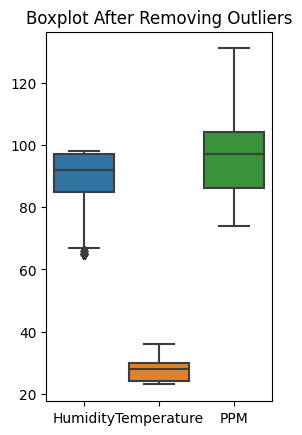

In [ ]:
# Create boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers[columns_to_check])
plt.title('Boxplot After Removing Outliers')

In [ ]:
df_no_outliers.tail()

,Timestamp,Temperature,Humidity,PPM
19358,12/16/2023 19:46,32.0,84.0,81.0
19359,12/16/2023 19:47,32.0,84.0,81.0
19360,12/16/2023 19:47,32.0,84.0,81.0
19361,12/16/2023 19:48,32.0,84.0,81.0
19362,12/16/2023 19:48,32.0,84.0,82.0


In [ ]:
df=df_no_outliers

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

<ipython-input-59-619f0e6abd1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


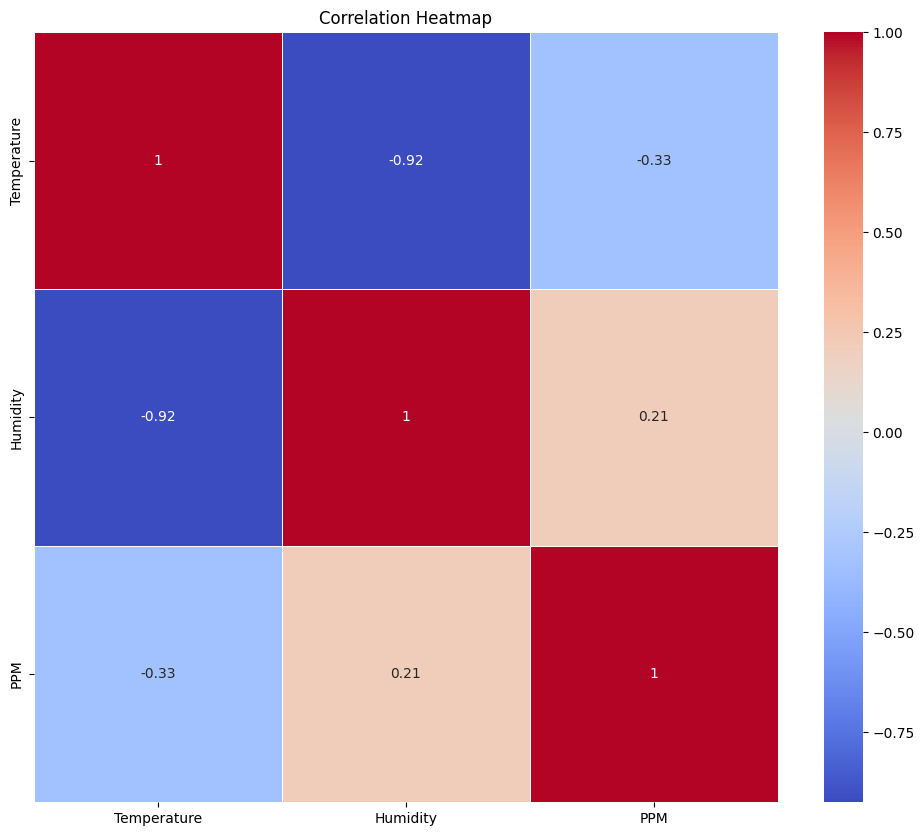

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

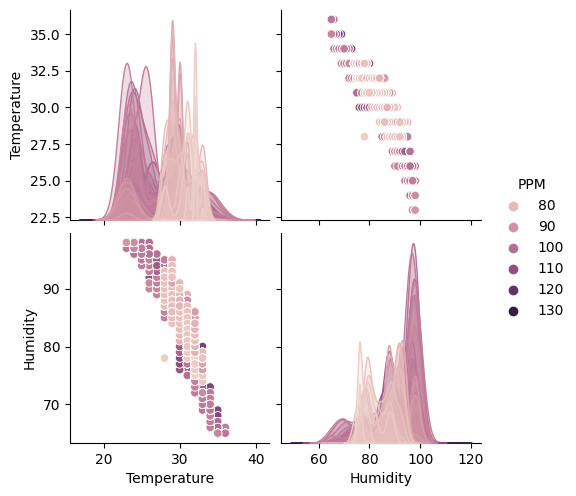

In [ ]:
# Pairplot
sns.pairplot(df, hue='PPM', diag_kind='kde')
plt.show()

In [ ]:
df.head()

,Timestamp,Temperature,Humidity,PPM
56,12/8/2023 23:08,26.0,96.0,128.0
58,12/8/2023 23:09,26.0,96.0,130.0
59,12/8/2023 23:09,26.0,96.0,131.0
60,12/8/2023 23:10,26.0,96.0,130.0
61,12/8/2023 23:10,26.0,96.0,128.0


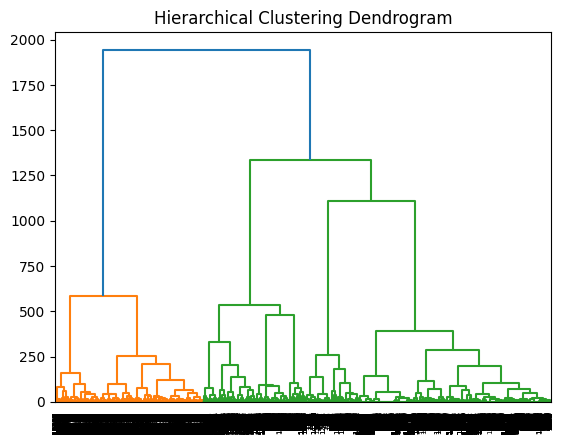

In [ ]:
# 3. Clustering
# Hierarchical Clustering
linkage_matrix = linkage(df[['Humidity', 'Temperature', 'PPM']], method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# K-Means Clustering with silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['Humidity', 'Temperature', 'PPM']])
    silhouette_avg = silhouette_score(df[['Humidity', 'Temperature', 'PPM']], cluster_labels)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

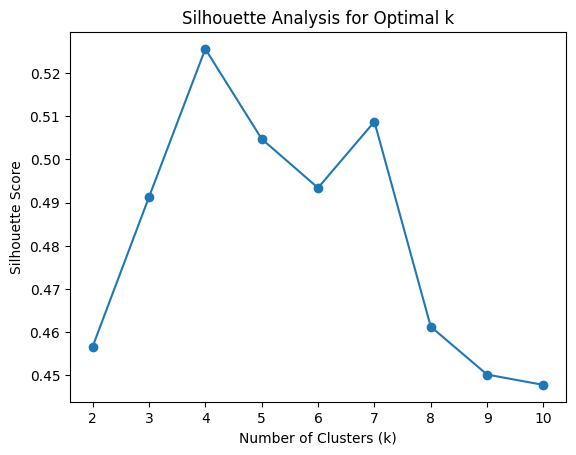

In [ ]:
# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [ ]:
# Apply K-Means clustering with the chosen k
optimal_k = 4  # Change this based on the analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Humidity', 'Temperature', 'PPM']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-67-dab48b652bf2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df[['Humidity', 'Temperature', 'PPM']])


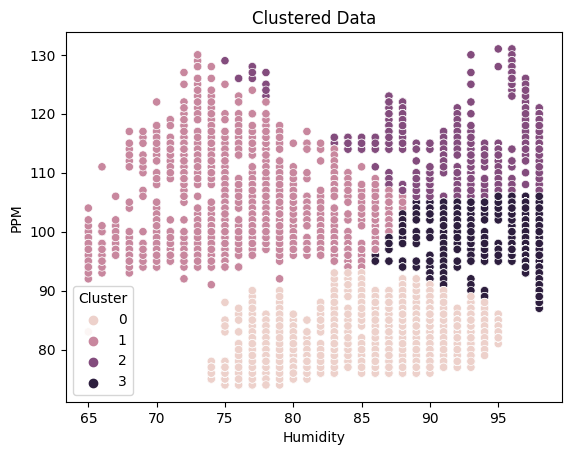

In [ ]:
# Visualize clustered data
sns.scatterplot(x='Humidity', y='PPM', hue='Cluster', data=df)
plt.title('Clustered Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10),
                 timings=False)

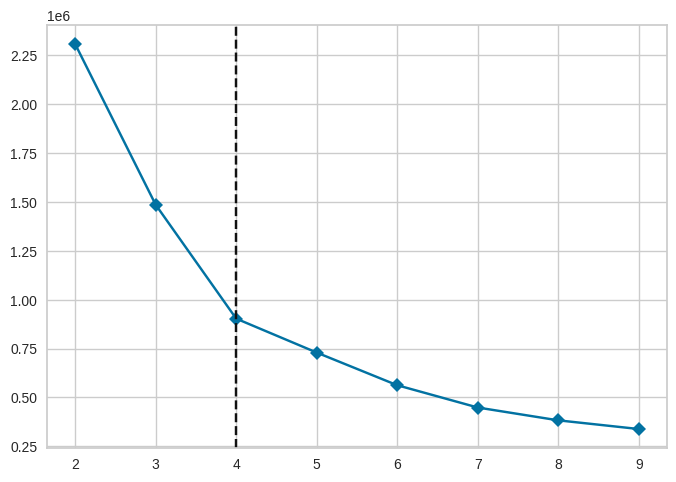

In [ ]:
# menentukan k optimal

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,10), timings=False)
visualizer.fit(df[['Humidity','Temperature','PPM']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

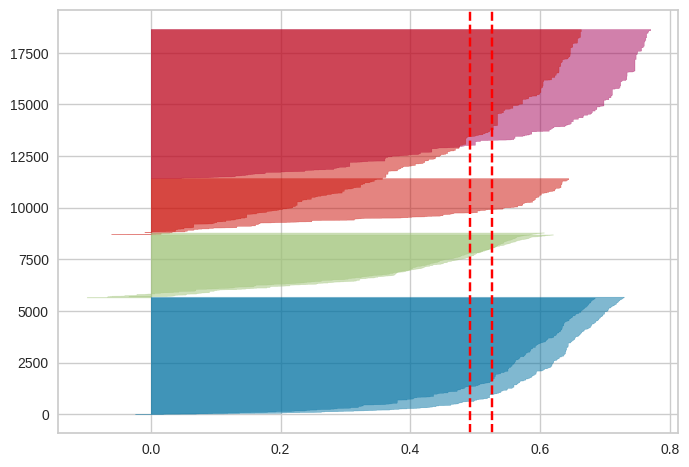

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
visualizer_silhouette1 = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
visualizer_silhouette2 = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')

visualizer_silhouette1.fit(df[['Humidity','Temperature','PPM']])        # Fit the data to the visualizer
visualizer_silhouette2.fit(df[['Humidity','Temperature','PPM']])

In [ ]:
df.head()

,Timestamp,Temperature,Humidity,PPM,Cluster
56,12/8/2023 23:08,26.0,96.0,128.0,2
58,12/8/2023 23:09,26.0,96.0,130.0,2
59,12/8/2023 23:09,26.0,96.0,131.0,2
60,12/8/2023 23:10,26.0,96.0,130.0,2
61,12/8/2023 23:10,26.0,96.0,128.0,2


In [ ]:
# Modeling

k_means = KMeans(init = "k-means++", n_clusters = 4, random_state = 42)
k_means.fit(df[['Humidity','Temperature','PPM']])
labels = k_means.labels_
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


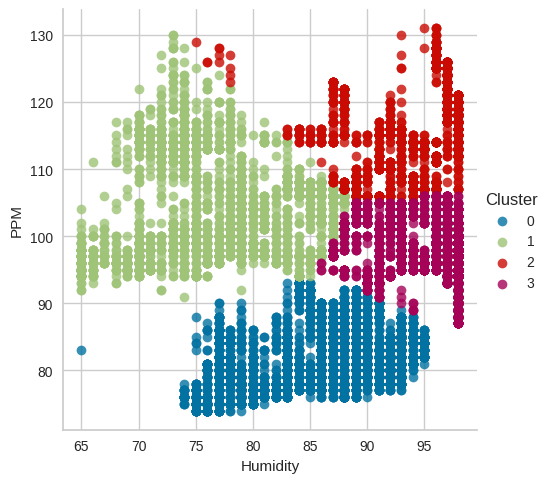

In [ ]:
# visualisasi persebaran data setiap cluster

import seaborn as sns
facet = sns.lmplot(data=df, x='Humidity', y='PPM', hue='Cluster',
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
df.head()

,Timestamp,Temperature,Humidity,PPM,Cluster
56,12/8/2023 23:08,26.0,96.0,128.0,2
58,12/8/2023 23:09,26.0,96.0,130.0,2
59,12/8/2023 23:09,26.0,96.0,131.0,2
60,12/8/2023 23:10,26.0,96.0,130.0,2
61,12/8/2023 23:10,26.0,96.0,128.0,2


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have already trained your model and assigned cluster labels to your data
# Example: df['Cluster'] = kmeans.fit_predict(df[['Humidity', 'Temperature', 'PPM']])

# Evaluate Silhouette Score
silhouette_avg = silhouette_score(df[['Humidity', 'Temperature', 'PPM']], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies-Bouldin Index
db_index = davies_bouldin_score(df[['Humidity', 'Temperature', 'PPM']], df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")



Silhouette Score: 0.5255967600566817
Davies-Bouldin Index: 0.6856438869037349


In [ ]:
from sklearn.model_selection import train_test_split

# Misalnya, kita memiliki kolom Cluster sebagai label kelas hasil clustering
X = df[['Humidity', 'Temperature', 'PPM']]
y = df['Cluster']

# Pisahkan dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi dan latih model klasifikasi
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediksi label kelas pada data pengujian
y_pred = clf.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9994627988181574


In [ ]:
df.head()

,Timestamp,Temperature,Humidity,PPM,Cluster
56,12/8/2023 23:08,26.0,96.0,128.0,2
58,12/8/2023 23:09,26.0,96.0,130.0,2
59,12/8/2023 23:09,26.0,96.0,131.0,2
60,12/8/2023 23:10,26.0,96.0,130.0,2
61,12/8/2023 23:10,26.0,96.0,128.0,2


In [ ]:
# Misalnya, kita memiliki data baru untuk diprediksi
new_data = pd.DataFrame({'Humidity': ['93'], 'Temperature': ['28'], 'PPM': ['100']})

# Gunakan model untuk membuat prediksi
predicted_cluster = clf.predict(new_data)
print(f"Predicted Cluster: {predicted_cluster}")


Predicted Cluster: [3]


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Misalnya, kita memiliki model RandomForestClassifier dan telah melatihnya
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Simpan model ke dalam file menggunakan pickle
with open('modeliot.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)


In [ ]:
!pip install fastapi uvicorn